In [54]:
import pandas as pd
import numpy as np
import pylab
import math
import os

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns


In [56]:
from scipy import stats

In [57]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
%matplotlib inline

In [59]:
df = pd.read_csv('data/kc_house_data.csv')

In [60]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [62]:
df.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [63]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [64]:
df.dropna()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,...,8,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [65]:
df_reno = df[df.yr_renovated != 0]

In [66]:
df_reno = df_reno.dropna()

In [67]:
df_reno

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
35,9547205180,6/13/2014,696000.0,3,2.50,2300,3060,1.5,0.0,0.0,...,8,1510,790.0,1930,2002.0,98115,47.6827,-122.310,1590,3264
95,1483300570,9/8/2014,905000.0,4,2.50,3300,10250,1.0,0.0,0.0,...,7,2390,910.0,1946,1991.0,98040,47.5873,-122.249,1950,6045
103,2450000295,10/7/2014,1090000.0,3,2.50,2920,8113,2.0,0.0,0.0,...,8,2920,0.0,1950,2010.0,98004,47.5814,-122.196,2370,8113
125,4389200955,3/2/2015,1450000.0,4,2.75,2750,17789,1.5,0.0,0.0,...,8,1980,770.0,1914,1992.0,98004,47.6141,-122.212,3060,11275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19577,421059018,11/4/2014,257000.0,3,1.75,1397,18000,1.0,0.0,0.0,...,7,1397,0.0,1965,2014.0,98092,47.3388,-122.166,1950,31294
19602,6392000625,7/12/2014,451000.0,2,1.00,900,6000,1.0,0.0,0.0,...,7,900,0.0,1944,2004.0,98115,47.6855,-122.289,1460,4800
20041,126039256,9/4/2014,434900.0,3,2.00,1520,5040,2.0,0.0,0.0,...,7,1520,0.0,1977,2006.0,98177,47.7770,-122.362,1860,8710
20428,4305600360,2/25/2015,500012.0,4,2.50,2400,9612,1.0,0.0,0.0,...,8,1230,1170.0,1962,2009.0,98059,47.4799,-122.127,2430,5539


In [68]:
#check for nulls
display(df_reno.isnull().any())
df_reno.shape

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

(651, 21)

In [69]:
min_threshold, max_threshold = df_reno.price.quantile([0.25, 0.75])
min_threshold, max_threshold

#removing outliers with interquartile method


(410000.0, 886250.0)

In [70]:
df_1 = df_reno[(df_reno.price < max_threshold) & (df_reno.price > min_threshold)]

In [71]:
#checking to see that the shape is smaller due to outliers being removed
df_1.shape

(323, 21)

In [72]:
df_1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
35,9547205180,6/13/2014,696000.0,3,2.50,2300,3060,1.5,0.0,0.0,...,8,1510,790.0,1930,2002.0,98115,47.6827,-122.310,1590,3264
209,6300000550,7/17/2014,464000.0,6,3.00,2300,3404,2.0,0.0,0.0,...,7,1600,700.0,1920,1994.0,98133,47.7067,-122.343,1560,1312
230,8096000060,4/13/2015,655000.0,2,1.75,1450,15798,2.0,1.0,4.0,...,7,1230,220.0,1915,1978.0,98166,47.4497,-122.375,2030,13193
379,7132300695,4/21/2015,435000.0,3,1.50,1300,3348,1.5,0.0,0.0,...,7,1300,0.0,1904,2014.0,98144,47.5920,-122.307,1590,2577


In [73]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323 entries, 1 to 20428
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             323 non-null    int64  
 1   date           323 non-null    object 
 2   price          323 non-null    float64
 3   bedrooms       323 non-null    int64  
 4   bathrooms      323 non-null    float64
 5   sqft_living    323 non-null    int64  
 6   sqft_lot       323 non-null    int64  
 7   floors         323 non-null    float64
 8   waterfront     323 non-null    float64
 9   view           323 non-null    float64
 10  condition      323 non-null    int64  
 11  grade          323 non-null    int64  
 12  sqft_above     323 non-null    int64  
 13  sqft_basement  323 non-null    object 
 14  yr_built       323 non-null    int64  
 15  yr_renovated   323 non-null    float64
 16  zipcode        323 non-null    int64  
 17  lat            323 non-null    float64
 18  long    

In [74]:
#removed objects
drop_these = ['date', 'sqft_basement']
df_1 = df_1.drop(columns=drop_these)

In [75]:
df_1.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,3.230000e+02,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000
mean,4.661972e+09,626192.681115,3.436533,2.267028,2157.832817,16022.287926,1.510836,0.024768,0.414861,3.216718,7.594427,1779.009288,1937.956656,1996.798762,98099.752322,47.600809,-122.271043,1869.139319,13810.071207
std,2.984808e+09,140811.528151,1.068244,0.739116,691.072227,42844.609403,0.486501,0.155658,1.009902,0.494786,0.759760,655.407571,22.813815,15.150582,50.359767,0.106457,0.126773,520.255541,31466.329486
min,9.000025e+06,411500.000000,1.000000,0.750000,880.000000,1024.000000,1.000000,0.000000,0.000000,2.000000,6.000000,600.000000,1900.000000,1934.000000,98001.000000,47.204600,-122.497000,860.000000,1281.000000
25%,2.026875e+09,500000.000000,3.000000,1.750000,1665.000000,4308.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1300.000000,1919.000000,1988.000000,98058.500000,47.550150,-122.363500,1497.000000,4560.000000
50%,4.083801e+09,600000.000000,3.000000,2.000000,2090.000000,6600.000000,1.500000,0.000000,0.000000,3.000000,8.000000,1670.000000,1938.000000,2000.000000,98115.000000,47.615800,-122.305000,1800.000000,6380.000000
75%,7.210501e+09,757500.000000,4.000000,2.750000,2645.000000,10800.000000,2.000000,0.000000,0.000000,3.000000,8.000000,2105.000000,1955.000000,2009.000000,98125.000000,47.680250,-122.201500,2125.000000,10307.000000
max,9.828702e+09,885000.000000,11.000000,5.750000,4600.000000,478288.000000,3.000000,1.000000,4.000000,5.000000,11.000000,4180.000000,2003.000000,2015.000000,98199.000000,47.777000,-121.723000,3520.000000,310582.000000


In [76]:
conts= []
cats= []
for col in df_1.columns:
    if (df_1[col].nunique() < 25):
        cats.append(col)
    else: 
        conts.append(col)

In [77]:
df_conts = df_1.loc[:,conts]

In [78]:
df_cats = df_1.loc[:,cats]

array([[<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'floors'}>],
       [<AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>],
       [<AxesSubplot:title={'center':'grade'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

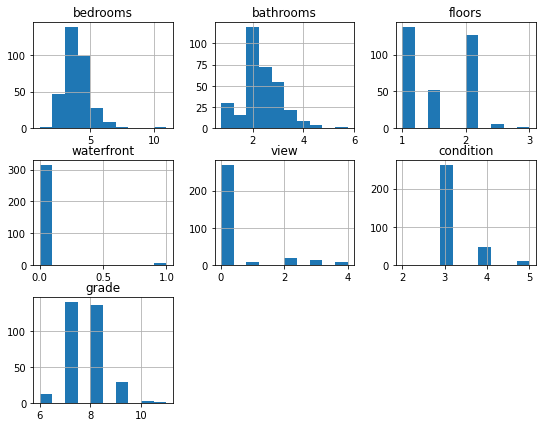

In [79]:
df_cats.hist(figsize = (9,7))

<AxesSubplot:>

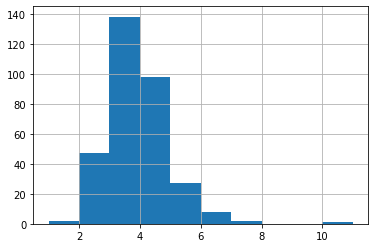

In [80]:
df_cats.bedrooms.hist()

In [81]:
df_1 = df_1[df_1['bedrooms'] < 9]

<AxesSubplot:>

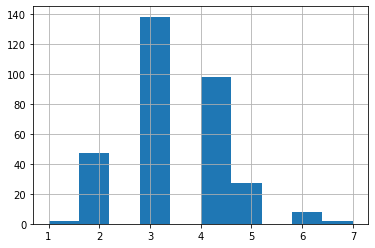

In [82]:
df_1.bedrooms.hist()

In [83]:
df_1.shape

(322, 19)

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'yr_built'}>],
       [<AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>]], dtype=object)

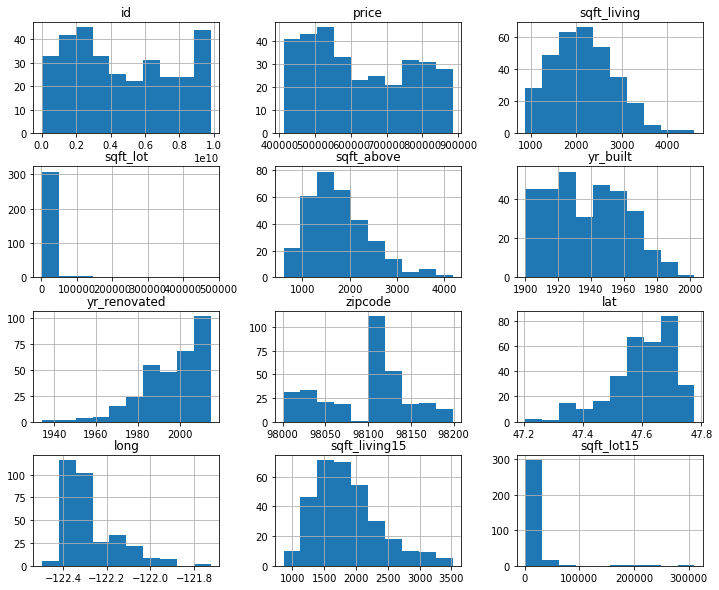

In [84]:
df_conts.hist(figsize = (12,10))

<AxesSubplot:>

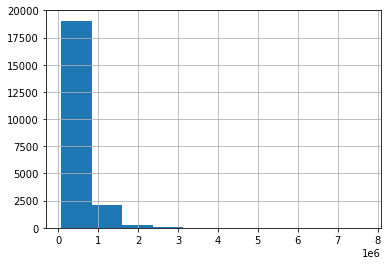

In [85]:
df.price.hist()

In [86]:
df_1 = df_1[df_1['price'] < 4000000]

<AxesSubplot:>

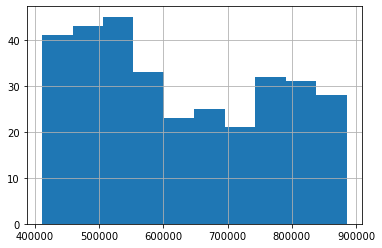

In [87]:
df_1.price.hist()

In [88]:
df_1.shape

(322, 19)

<AxesSubplot:>

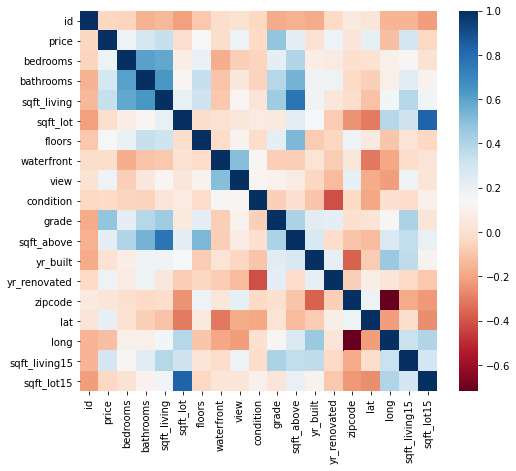

In [89]:
#Looking at the correlation between different columns to check for multicollinearity.

plt.figure(figsize = (8,7))
sns.heatmap(df_1.corr(), cmap = 'RdBu')

In [90]:
df_1.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.045623,-0.053007,-0.155473,-0.135423,-0.212064,-0.092382,-0.006647,0.018863,-0.037811,-0.175970,-0.163383,-0.174664,-0.027123,0.055728,0.032352,-0.148582,-0.148171,-0.216891
price,-0.045623,1.000000,0.185182,0.293457,0.341211,-0.001161,0.137421,-0.008109,0.194329,-0.028878,0.480652,0.223212,0.009667,0.192836,0.031611,0.220481,-0.117264,0.300047,-0.036492
bedrooms,-0.053007,0.185182,1.000000,0.608049,0.588314,0.080469,0.197164,-0.168848,-0.070051,-0.050629,0.228053,0.397915,0.077711,0.073881,0.004369,0.009187,0.089190,0.131993,0.017149
bathrooms,-0.155473,0.293457,0.608049,1.000000,0.643258,0.126382,0.338580,-0.104576,0.053240,-0.055577,0.383476,0.546142,0.178476,0.187004,-0.032839,-0.062519,0.088391,0.241571,0.102490
sqft_living,-0.135423,0.341211,0.588314,0.643258,1.000000,0.212289,0.320674,-0.087386,0.123323,0.031979,0.448476,0.771713,0.180876,0.043190,-0.017412,-0.111113,0.162255,0.389271,0.171970
sqft_lot,-0.212064,-0.001161,0.080469,0.126382,0.212289,1.000000,-0.008696,0.009286,0.043621,0.064729,0.060428,0.231630,0.151231,-0.079653,-0.244862,-0.304246,0.383213,0.316392,0.833323
floors,-0.092382,0.137421,0.197164,0.338580,0.320674,-0.008696,1.000000,-0.023600,0.112413,-0.014893,0.224997,0.526297,-0.074511,-0.043626,0.188195,0.054143,-0.098134,0.021302,-0.037985
waterfront,-0.006647,-0.008109,-0.168848,-0.104576,-0.087386,0.009286,-0.023600,1.000000,0.507300,0.131533,-0.072818,-0.069648,0.023511,-0.074192,0.045221,-0.309101,-0.190425,-0.014140,0.031192
view,0.018863,0.194329,-0.070051,0.053240,0.123323,0.043621,0.112413,0.507300,1.000000,0.123561,0.101714,0.067597,-0.044074,-0.127731,0.218474,-0.177328,-0.215526,0.186116,0.031399
condition,-0.037811,-0.028878,-0.050629,-0.055577,0.031979,0.064729,-0.014893,0.131533,0.123561,1.000000,-0.064016,0.001836,-0.103685,-0.411700,-0.027467,-0.193725,0.005901,-0.017343,0.099357


In [91]:

#variance inflation factor
X1 = sm.tools.add_constant(df_1)
#create a series for both
series_before = pd.Series([variance_inflation_factor(X1.values, i ) for i in range(X1.shape[1])], index = X1.columns)

print('DATA BEFORE')
print('-'*100)
display(series_before)
#dropping columns i think will cause problems
df_1_after = df_1.drop(['id', 'sqft_living', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'sqft_lot', 'zipcode'], axis = 1)
X2 = sm.tools.add_constant(df_1_after)
series_after = pd.Series([variance_inflation_factor(X2.values, i ) for i in range(X2.shape[1])], index = X2.columns)

print('DATA AFTER')
print('-'*100)
display(series_after)

DATA BEFORE
----------------------------------------------------------------------------------------------------


const            5.449336e+06
id               1.125462e+00
price            1.717068e+00
bedrooms         1.978762e+00
bathrooms        2.295491e+00
sqft_living      4.091660e+00
sqft_lot         3.568218e+00
floors           1.762091e+00
waterfront       1.665583e+00
view             1.679208e+00
condition        1.294026e+00
grade            1.794624e+00
sqft_above       3.970212e+00
yr_built         1.661552e+00
yr_renovated     1.497634e+00
zipcode          2.434543e+00
lat              1.498547e+00
long             3.251306e+00
sqft_living15    1.771897e+00
sqft_lot15       3.614839e+00
dtype: float64

DATA AFTER
----------------------------------------------------------------------------------------------------


const         1.564490e+06
price         1.531043e+00
bedrooms      1.661138e+00
bathrooms     2.092258e+00
floors        1.612685e+00
waterfront    1.588605e+00
view          1.500929e+00
condition     1.073146e+00
grade         1.592112e+00
sqft_above    2.267866e+00
yr_built      1.469245e+00
lat           1.388480e+00
long          1.588229e+00
dtype: float64

In [92]:
X = df_1_after.drop('price', axis = 1)
y = df_1_after[['price']]

#Split dataset into training and testing portion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

#create instance of our model
regression_model = LinearRegression()
#fit the model
regression_model.fit(X_train, y_train)

LinearRegression()

In [93]:
len(X_test)

65

In [94]:
y_hat_train = regression_model.predict(X_train)
y_hat_test = regression_model.predict(X_test)

In [95]:
mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)

In [96]:
print('Train MSE:', mse_train)
print('Test MSE:', mse_test)

Train MSE: 12422462624.74195
Test MSE: 16045856799.566864


In [97]:
print('RMSE Train:', np.sqrt(mse_train))
print('RMSE Test:', np.sqrt(mse_test))

RMSE Train: 111456.10178335661
RMSE Test: 126672.24162999116


In [98]:
r2_score(y_test, y_hat_test)

0.28151498102309214

In [99]:
#get predictions
y_predict = regression_model.predict(X_test)
#first five
y_predict[:5]

array([[582506.73534974],
       [632782.38617299],
       [561679.87263293],
       [609934.62806033],
       [538908.51446496]])

In [100]:
#Exploring the intercept and coefficient

intercept = regression_model.intercept_[0]
coef = regression_model.coef_[0][0]

print('The intercept for our model is {:.4}'.format(intercept))
print('-'*100)

#Loop through the dictionary and print the coeffcient data
#so, for instance, for each unit in sqft_above, there is a 9.4% rise in price.
for coef in zip(X.columns, regression_model.coef_[0]):
    print('The Coefficient for {} is {:.2}'.format(coef[0], coef[1]))

The intercept for our model is -2.86e+07
----------------------------------------------------------------------------------------------------
The Coefficient for bedrooms is 1.1e+04
The Coefficient for bathrooms is 2.8e+04
The Coefficient for floors is -3e+04
The Coefficient for waterfront is -5.3e+04
The Coefficient for view is 2.6e+04
The Coefficient for condition is 1.4e+03
The Coefficient for grade is 7.3e+04
The Coefficient for sqft_above is 1.3e+01
The Coefficient for yr_built is -6.3e+02
The Coefficient for lat is 2.8e+05
The Coefficient for long is -1.3e+05


In [101]:
X_1 = sm.add_constant(X)
model = sm.OLS(y, X_1)
est = model.fit()

In [102]:
#Heteroscedasticity checks
_, pval, _, f_pval = diag.het_breuschpagan(est.resid, est.model.exog)
print(pval, f_pval)

0.17977956940483966 0.17965717998019723


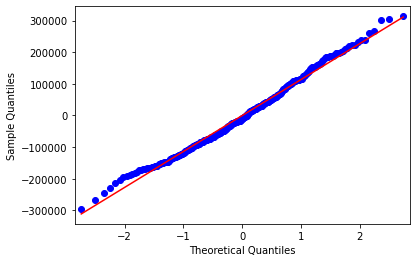

Mean: -3.094767561610441e-09


In [103]:
#check for the normality of the residuals
sm.qqplot(est.resid, line = 's')
pylab.show()

#check that the mean of the residuals is approx. 0
mean_residuals = sum(est.resid) / len(est.resid)
print("Mean:", mean_residuals)

In [104]:
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     14.97
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           2.84e-23
Time:                        09:13:58   Log-Likelihood:                -4205.4
No. Observations:                 322   AIC:                             8435.
Df Residuals:                     310   BIC:                             8480.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.698e+07   7.93e+06     -3.402      0.0

In [107]:
import plotly.express as px
fig = px.box(df_1_after, x="grade", y="price")
fig.show()